<a href="https://colab.research.google.com/github/SQUADRON-LEADER/Route-finding-problem/blob/main/Route_finding_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.6 MB/s eta 0:00:00


Button(description='Play', style=ButtonStyle())

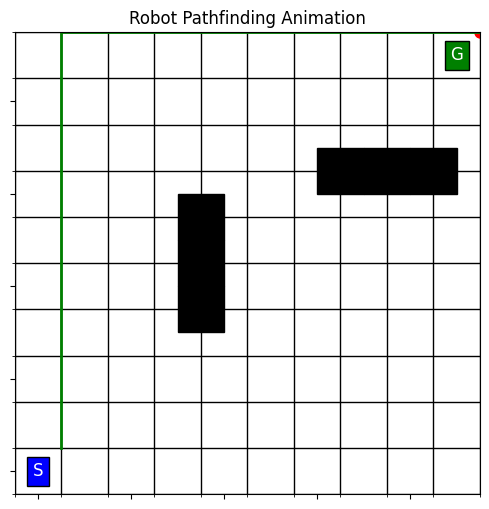

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display
import ipywidgets as widgets

# Define grid size and obstacles
GRID_SIZE = (10, 10)
START = (0, 0)
GOAL = (9, 9)
OBSTACLES = [(3, 3), (3, 4), (3, 5), (6, 6), (7, 6), (8, 6)]

# Possible movement directions (Up, Down, Left, Right)
MOVES = [(0, 1), (1, 0), (0, -1), (-1, 0)]

class Node:
    """Represents a node in the grid."""
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0  # Cost from start
        self.h = 0  # Heuristic cost to goal
        self.f = 0  # Total cost

    def __lt__(self, other):
        return self.f < other.f

def heuristic(a, b):
    """Manhattan distance heuristic function."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(start, goal):
    """A* pathfinding algorithm."""
    open_list = []
    closed_list = set()

    start_node = Node(start)
    goal_node = Node(goal)

    open_list.append(start_node)

    path = []

    while open_list:
        open_list.sort()
        current_node = open_list.pop(0)

        if current_node.position == goal_node.position:
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]  # Return path from start to goal

        closed_list.add(current_node.position)

        for move in MOVES:
            new_pos = (current_node.position[0] + move[0], current_node.position[1] + move[1])

            if (0 <= new_pos[0] < GRID_SIZE[0] and
                0 <= new_pos[1] < GRID_SIZE[1] and
                new_pos not in OBSTACLES and
                new_pos not in closed_list):

                new_node = Node(new_pos, current_node)
                new_node.g = current_node.g + 1
                new_node.h = heuristic(new_pos, goal_node.position)
                new_node.f = new_node.g + new_node.h

                if not any(node.position == new_node.position and node.f <= new_node.f for node in open_list):
                    open_list.append(new_node)

    return []  # No path found

# Find path
path = astar(START, GOAL)

# Prepare figure
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-0.5, GRID_SIZE[1]-0.5)
ax.set_ylim(-0.5, GRID_SIZE[0]-0.5)
ax.set_xticks(np.arange(-0.5, GRID_SIZE[1], 1), minor=True)
ax.set_yticks(np.arange(-0.5, GRID_SIZE[0], 1), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Robot Pathfinding Animation")

# Draw obstacles
for obs in OBSTACLES:
    ax.add_patch(plt.Rectangle(obs, 1, 1, color='black'))

# Plot Start and Goal
ax.text(START[0], START[1], "S", fontsize=12, ha='center', va='center', color='white', bbox=dict(facecolor='blue'))
ax.text(GOAL[0], GOAL[1], "G", fontsize=12, ha='center', va='center', color='white', bbox=dict(facecolor='green'))

# Animation elements
robot, = ax.plot([], [], 'ro', markersize=8)
final_line, = ax.plot([], [], 'g-', linewidth=2)  # Final path line (FIXED)

# Animation update function
def update(frame):
    if frame < len(path):
        pos = path[frame]
        robot.set_data([pos[0] + 0.5], [pos[1] + 0.5])  # Corrected line
    elif frame == len(path):  # After animation, draw final path
        final_x = [p[0] + 0.5 for p in path]
        final_y = [p[1] + 0.5 for p in path]
        final_line.set_data(final_x, final_y)
    return robot, final_line

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(path) + 1, interval=500, repeat=False)

# Store animation properly before displaying
HTML_animation = HTML(ani.to_jshtml())

# Buttons
play_button = widgets.Button(description="Play")

def play_animation(b):
    display(HTML_animation)  # Display animation

play_button.on_click(play_animation)

# Display Play button
display(play_button)
plt.show()
